A tensorflow egy olyan gépi tanulást megvalósító modul, amelyet a Google a fejlesztett.

Saját adatszerkezetet használ, a tensor-t.

A tensorok tulajdonképpen többdimenziós tömbök, melyek a numerikus adatokkal történő munkát valósítják meg.

A tensorok több gyakran használt attribútummal rendelkeznek, melyek a következők:

*   rank - a dimenziók száma
*   shape - a dimenziók mérete
*   dtype - a tensor típusa



A tensorflow modul importálása:

In [1]:
import tensorflow as tf

Tensor létrehozása:

In [2]:
a = tf.constant(10.0) # skalár
a

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

Tensor adatainak lekérdezése:

In [3]:
example_tensor = tf.constant([[1, 2, 3], [4, 5, 6]]) # mátrix
print(tf.rank(example_tensor))

tf.Tensor(2, shape=(), dtype=int32)


In [4]:
print(example_tensor.dtype)

<dtype: 'int32'>


In [5]:
print(example_tensor.shape)

(2, 3)


Indexelés:

In [6]:
example_tensor[:, 1:]


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [5, 6]], dtype=int32)>

Múveletvégzés:

In [7]:
tf.add(example_tensor, 100)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[101, 102, 103],
       [104, 105, 106]], dtype=int32)>

In [8]:
tf.square(example_tensor)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)>

A tensorflow használata leginkább a custom modell-ek, training loop-ok és loss function-ök esetében jellemző.

Viszont rendelkezik egy ún. Keras al-modullal, ami egyszerűbb módot biztosít a neurális hálók készítéséhez.

In [9]:
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd

A fashion dataset betöltése:

In [10]:
fashion = keras.datasets.fashion_mnist

In [11]:
data = fashion.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
print(type(data))
print(len(data))

<class 'tuple'>
2


In [13]:
train, test = data

In [ ]:
print(type(train))
print(len(train))
print("---")
print(type(test))
print(len(test))

<class 'tuple'>
2
---
<class 'tuple'>
2


In [14]:
train_x, train_y = train
test_x, test_y = test

In [15]:
print(type(train_x))
print(len(train_x))

<class 'numpy.ndarray'>
60000


In [16]:
print(train_x.shape)
train_x.dtype

(60000, 28, 28)


dtype('uint8')

In [17]:
class_names = ["Póló", "Nadrág", "Pulóver", "Egyrészes ruha", "Kabát",
 "Szandál", "Ing", "Cipő", "Táska", "Bakancs"]


Egy példa kép megjelenítése:

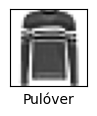

In [18]:
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(train_x[5], cmap=plt.cm.binary)
plt.xlabel(class_names[train_y[5]])
plt.show()

In [19]:
train_x[0].shape

(28, 28)

Adatok normalizálása a gyorsabb, hatékonyabb tanulás érdekében:

In [20]:
normalized_train_x = train_x / 255.0
normalized_test_x = test_x / 255.0

Ez a kód két dolgot csinál:

Először a train_x adathalmazt két részre osztja: az első 5000 elemet a validation_x változóba teszi, a maradékot pedig a train_x változóban hagyja. Az osztás 255.0-val a képpontok értékének normalizálását jelenti, ami gyakori lépés a képfeldolgozásban. A képpontok értékei általában 0 és 255 között vannak, így az osztás eredménye egy 0.0 és 1.0 közötti érték lesz.

A második sorban ugyanezt csinálja a train_y adathalmazzal, de itt nincs osztás, mert feltételezhetően a train_y címkék vagy kategóriák, amiket nem kell normalizálni.

Összefoglalva, ez a kód létrehoz egy validációs halmazt (az első 5000 elemet használva) és egy tanító halmazt (a maradék elemeket használva), és normalizálja a képpontok értékeit a train_x adathalmazban.

Mivel az adathalmaz nem rendelkezik validation adatokkal, ezért kézzel kell létrehozni őket (már a normalizálással együtt):
A validációs halmazt általában a modell hiperparamétereinek finomhangolására és a modell teljesítményének értékelésére használják a tanítási folyamat során, de még a tesztelés előtt.

A tanítási adathalmazon tanítjuk a modellt, majd a validációs halmazon értékeljük a modell teljesítményét. Ez lehetővé teszi, hogy lássuk, hogyan teljesít a modell olyan adatokon, amelyeket még nem látott, de mégis hasonlóak a tanítási adathalmazhoz. Ez segít elkerülni az úgynevezett túltanulást (overfitting), ami akkor történik, amikor a modell túl jól illeszkedik a tanítási adatokhoz, de nem képes jól teljesíteni új, ismeretlen adatokon.

A validációs halmaz tehát segít abban, hogy a modellünk ne csak a tanítási adatokra legyen optimalizálva, hanem új, ismeretlen adatokra is jól tudjon teljesíteni.

In [21]:
validation_x, train_x = train_x[:5000] / 255.0, train_x[5000:] / 255.0
validation_y, train_y = train_y[:5000], train_y[5000:]

**A modell felépítése:**

Egy szekvenciális modell példány elkészítése:

In [22]:
model = keras.models.Sequential()

In [23]:
print(28*28)

784


Az első, azaz a Flatten réteg hozzáadása a modellhez.

Ennek a rétegnek csak előkészítési célja van. 1 dimenziós tömbbé konvertálja a bemeneti 28x28-as adatokat

In [24]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


A rejtett rétegek hozzáadása.

Ezekben a rétegekben történik a hálózat tanítása. Mindegyik réteg a saját súlyait és kapcsolatait kezeli.

In [25]:
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

A kimenetet előállító réteg hozzáadása.

A softmax aktivációs függvény valószínűségeket fog rendelni az összes csoporthoz, amely szerepel a tanuló adatokban(ebben az esetben 10 csoport)

A második paraméter, az activation="softmax", azt jelenti, hogy a softmax aktivációs függvényt használjuk. A softmax függvényt gyakran használják a kimeneti rétegben többosztályos osztályozási problémák esetén, mert a softmax függvény kimenetei valószínűségi értékek, amelyek összege 1. Ez lehetővé teszi, hogy a modell kimenetei közvetlenül értelmezhetők legyenek valószínűségekként.

In [26]:
model.add(keras.layers.Dense(10, activation="softmax"))

Egyanezt a modell létrehozást meg lehet adni egy rövidebb alak formájában is:

A második paraméter, az activation="relu", azt jelenti, hogy a ReLU (Rectified Linear Unit) aktivációs függvényt használjuk. A ReLU függvény a bemenetét 0-ra állítja, ha az negatív, és hagyja változatlanul, ha az pozitív. Ez a függvény gyakran használt aktivációs függvény mély neurális hálózatokban, mert segít a gradiens eltűnésének problémájának kezelésében, ami gyakori probléma a mély neurális hálózatok tanítása során.

A gradiens eltűnése probléma a mély neurális hálózatok tanításának gyakori problémája, különösen a hagyományos aktivációs függvények, mint például a szigmoid és a tanh használatakor. A probléma lényege, hogy a hálózat mélyebb rétegeiben a gradiensek (amelyek a hiba visszaterjesztésének (backpropagation) során számítódnak ki) nagyon kicsivé válhatnak. Ez azt eredményezi, hogy a súlyok frissítése minimálisra csökken, így a tanulási folyamat lassúvá vagy akár megállhat.

In [27]:
shorter_form = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

A modell vizualizációja:

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

A modell lefordítása(véglegesítése):

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

A modell tanítása:
The current metrics show that the training accuracy is around 89.67%, with a loss of 0.2887. The validation accuracy is slightly lower at 88.80%, with a corresponding validation loss of 0.3150.

  A jelenlegi mérőszámok azt mutatják, hogy a képzési pontosság 89,67% körüli, a veszteség pedig 0,2887. A validálási pontosság valamivel alacsonyabb, 88,80%, a megfelelő validálási veszteség 0,3150.

In [30]:
history = model.fit(train_x, train_y, epochs=30,
                    validation_data=(validation_x, validation_y))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6789 - loss: 1.0274 - val_accuracy: 0.8242 - val_loss: 0.5193
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8231 - loss: 0.5098 - val_accuracy: 0.8350 - val_loss: 0.4723
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8416 - loss: 0.4550 - val_accuracy: 0.8596 - val_loss: 0.4081
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8508 - loss: 0.4219 - val_accuracy: 0.8666 - val_loss: 0.3932
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8574 - loss: 0.4043 - val_accuracy: 0.8658 - val_loss: 0.3845
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8623 - loss: 0.3847 - val_accuracy: 0.8736 - val_loss: 0.3702
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8687 - loss: 0.3661 - val_accuracy: 0.8698 - val_loss: 0.3640
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8751 - loss: 0.3534

A tanulás során elért eredmények vizualizációja:

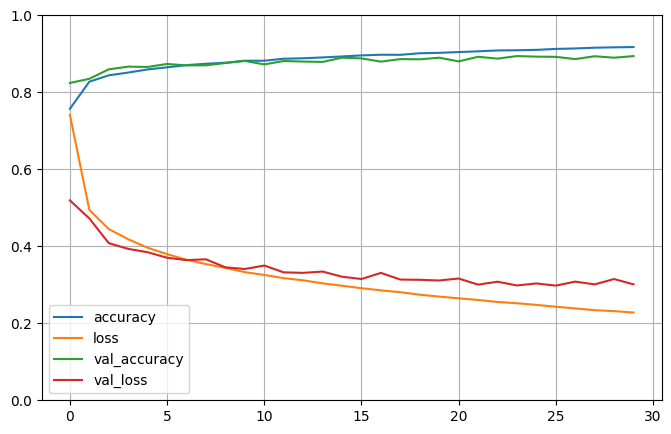

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # a függőleges tengely skálázása 0 és 1 közé
plt.show()

A modell tesztelése:

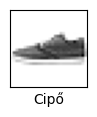

In [32]:
image = test_x[60]
label = test_y[60]

plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap=plt.cm.binary)
plt.xlabel(class_names[label])
plt.show()

In [33]:
predicted_y = model.predict(test_x[60:61])
print(predicted_y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [34]:
index = predicted_y.tolist()[0].index(1.0)
print(class_names[index])

Cipő


In [35]:
model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 70.0491


[73.73979187011719, 0.8292999863624573]

In [36]:
#for layer in model.layers:
  #model.layers[1].get_weights()[1]
#  weights, biases = get_weights()[0]
#  print(weights)
#  print(biases)
#TODO get weigths error

# Print weights calculated in network

for layer in model.layers:
  try:
    w,b = layer.get_weights()
    print(w)
    print(b)
  except Exception as e:
    print(e) # not all layers have weights !

not enough values to unpack (expected 2, got 0)
[[-0.05831293 -0.05075293 -0.04959144 ... -0.05692147 -0.03426501
   0.03052484]
 [-0.01807588 -0.04764918  0.0383588  ... -0.050645    0.06492949
  -0.06623192]
 [ 0.04863563 -0.01584774 -0.0447381  ... -0.01390082 -0.0183033
   0.03500702]
 ...
 [-0.03200683  0.0767866  -0.06620553 ... -0.02781071  0.08045375
   0.0100388 ]
 [ 0.06020017  0.04070596 -0.07659616 ...  0.02991167  0.04356055
  -0.06561539]
 [-0.07277726 -0.01337171 -0.04333859 ... -0.02464938 -0.06891903
  -0.05827206]]
[ 2.20016614e-02 -1.08705191e-02  6.84605315e-02  7.61736184e-02
  5.39467530e-03  1.91238716e-01 -1.32635301e-02  1.17730361e-03
 -3.39298807e-02  1.85518749e-02  5.68449730e-03  7.24316910e-02
  7.23463222e-02 -1.01645375e-02  1.64385244e-01  1.37617320e-01
  2.02805847e-02 -1.40926823e-01  1.06733941e-01 -1.80002786e-02
 -1.33346409e-01  1.64564177e-01 -9.41526964e-02 -1.28403261e-01
  1.18151762e-01 -8.81646574e-02 -1.89572119e-03  1.68420486e-02
  5.65